In [ ]:
#Imported the libraries required for the Project Implementation
import math
import random
import scipy.io
import numpy as np
import pandas as pd
from numpy import matlib
import matplotlib.pyplot as plt
#Data Extraction 
sample = scipy.io.loadmat("/content/AllSamples.mat")
#Data stored in DataFrame using Pandas Library
data = pd.DataFrame(sample['AllSamples'], columns=['a1','a2'])
#Data stored as array using NumPy Library
data1 = np.array(data)

In [ ]:
#Calculating the Euclidean Distance between two points. As it is the similarity measure used in this project.
def euclidean_distance(a, b):
    return(sum((a - b)**2))**0.5

#New Centroids calculation by taking the average of all the data points in each respective cluster.
def new_centroids_calculation(clusters_label, np_data):
    centroids = []
    data_new = pd.concat([pd.DataFrame(np_data), pd.DataFrame(clusters_label, columns=['cluster_label'])],axis=1)
    for cluster in set(data_new['cluster_label']):
        cluster_new = data_new[data_new['cluster_label'] == cluster][data_new.columns[:-1]]
        new_mean = cluster_new.mean(axis=0)
        centroids.append(new_mean)
    return centroids

#Objective Function Calculation by taking the sum of difference of data points and their respective cluster means as a function of k.
def objective_function(cen,np_data,k):
    objective_distance = []
    for i in np_data:
      d=[]
      for j in range(k):
        a=cen[j]
        d.append(euclidean_distance(i, a))
      objective_distance.append(pow(d[np.argmin(d)],2))
    return sum(objective_distance)

#Returns the cluster to which the data points belongs to.
def Cluster_Assignment(cen, np_data):
    clusters = []
    for i in np_data:
        d=[]
        for j in cen:
            d.append(euclidean_distance(i, j))
        clusters.append(np.argmin(d))
    return clusters

Strategy 1 with Initialization 1 for cluster 2 the initial centers are: [[2.81629029 3.1999725 ]
 [8.53986559 3.38241162]]


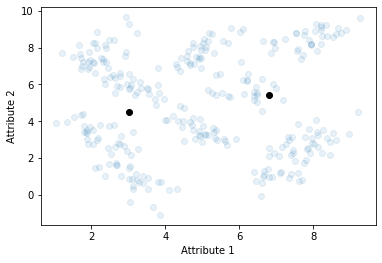

Strategy 1 with Initialization 1 for cluster 3 the initial centers are: [[3.79752017 0.69134312]
 [4.30954572 6.96097943]
 [6.39056222 5.17956451]]


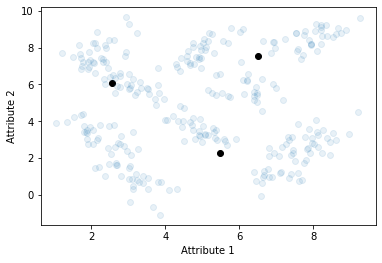

Strategy 1 with Initialization 1 for cluster 4 the initial centers are: [[2.18568667 3.11739024]
 [8.44178587 2.18453296]
 [2.3537231  6.29810755]
 [7.52095236 8.80020339]]


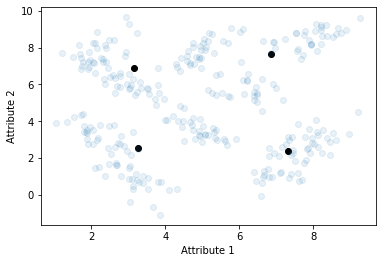

Strategy 1 with Initialization 1 for cluster 5 the initial centers are: [[2.95297924 9.65073899]
 [8.26213369 3.53415034]
 [4.68128498 3.98291658]
 [3.75004647 4.90070114]
 [1.96633923 7.30845038]]


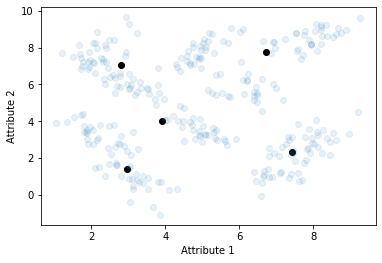

Strategy 1 with Initialization 1 for cluster 6 the initial centers are: [[6.60277235 6.31081582]
 [6.90753101 8.3019514 ]
 [8.61947945 2.98598319]
 [2.04945194 2.75937105]
 [3.09999409 0.8385499 ]
 [8.75754845 8.81745441]]


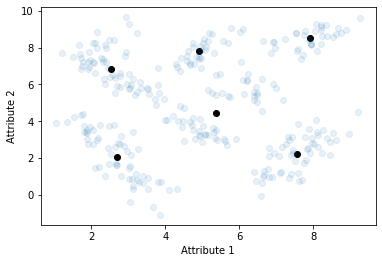

Strategy 1 with Initialization 1 for cluster 7 the initial centers are: [[2.80096609 1.03176348]
 [8.20129386 9.21291541]
 [3.09999409 0.8385499 ]
 [1.79534908 3.7348206 ]
 [3.32202131 6.15602339]
 [1.20162248 7.68639714]
 [5.27137631 5.53516715]]


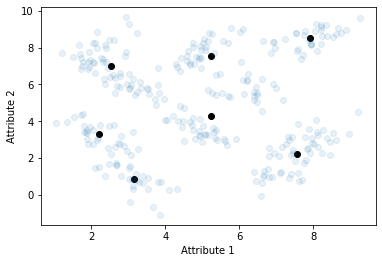

Strategy 1 with Initialization 1 for cluster 8 the initial centers are: [[ 6.48423011  5.04416608]
 [ 2.78903847  6.44350728]
 [ 3.66118224 -0.63372377]
 [ 1.89785053  3.50014156]
 [ 3.0093283   1.45065717]
 [ 4.40304734  4.81434354]
 [ 7.52095236  8.80020339]
 [ 6.65537695  1.30451652]]


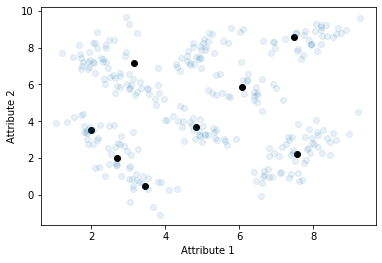

Strategy 1 with Initialization 1 for cluster 9 the initial centers are: [[ 8.12343078  2.60762469]
 [ 1.51180219  7.48293717]
 [ 4.91688902  7.51334885]
 [ 3.66118224 -0.63372377]
 [ 4.40304734  4.81434354]
 [ 4.75184863  4.20214023]
 [ 3.85212146 -1.08715226]
 [ 1.89785053  3.50014156]
 [ 2.10054891  1.44144019]]


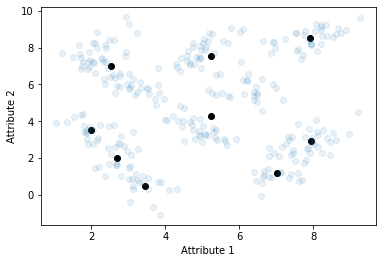

Strategy 1 with Initialization 1 for cluster 10 the initial centers are: [[4.97304553 7.4290438 ]
 [5.25103144 8.74212485]
 [2.37650624 8.15241778]
 [6.99180377 5.7932428 ]
 [5.27137631 5.53516715]
 [6.94511561 8.30517945]
 [2.16482565 7.993515  ]
 [7.12751003 1.23747391]
 [5.68766272 5.38279515]
 [6.39056222 5.17956451]]


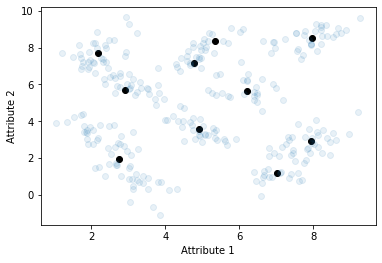

In [ ]:
#Strategy 1 with Initialization 1
last = []
for i in range(2,11):
    p = random.sample(range(0, len(data)), i)
    cen = []
    #Randomly picking the initial centers 
    for j in p:
        cen.append(data.loc[j])
    cen = np.array(cen)
    print("Strategy 1 with Initialization 1 for cluster "+str(i)+" the initial centers are:",cen)
    #Performing the K-Means Algorithm & checking the convergence condition with the help of objective function.  
    before = 0
    objective_distance=objective_function(cen,data1,i)
    #If the objective distance of the two consecutive steps is equal then the loop terminates. 
    while before-objective_distance:
        before = objective_distance
        new_cen = Cluster_Assignment(cen, data1)
        cen = new_centroids_calculation(new_cen, data1)
        objective_distance=objective_function(cen,data1,i)
    last.append(objective_distance)
    plt.scatter([cen[i][0] for i in range(0,len(cen))], [cen[i][1] for i in range(len(cen))] ,color='black')
    plt.scatter(data['a1'],data['a2'], alpha=0.1)
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.show()

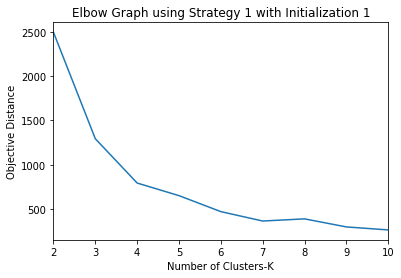

In [ ]:
#Plotting the objective function distance vs number of k clusters Strategy 1 with Initialization 1
k= [2,3,4,5,6,7,8,9,10]
plt.plot(k, last)
plt.xlim(2,10)
plt.title('Elbow Graph using Strategy 1 with Initialization 1')
plt.ylabel('Objective Distance')
plt.xlabel('Number of Clusters-K')
plt.show()

Strategy 1 with Initialization 2 for cluster 2 the initial centers are: [[1.51180219 7.48293717]
 [6.39627447 1.24125663]]


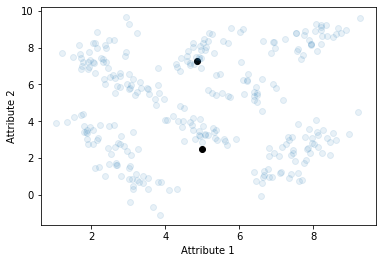

Strategy 1 with Initialization 2 for cluster 3 the initial centers are: [[5.68845261 8.27229082]
 [6.46270852 5.83507122]
 [6.85653225 7.72468825]]


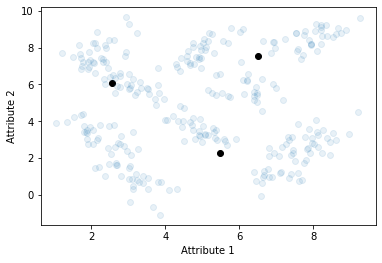

Strategy 1 with Initialization 2 for cluster 4 the initial centers are: [[1.72614408 6.81819407]
 [3.14009486 0.34589487]
 [3.81485895 6.91844078]
 [8.36230458 3.08961725]]


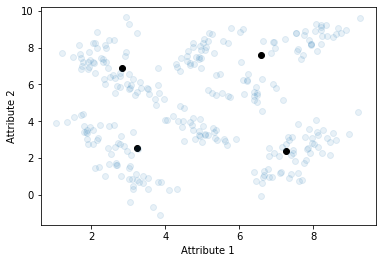

Strategy 1 with Initialization 2 for cluster 5 the initial centers are: [[3.89523379 0.70718356]
 [7.30246332 3.16580577]
 [9.21069612 4.5106493 ]
 [7.60284588 0.778726  ]
 [2.78903847 6.44350728]]


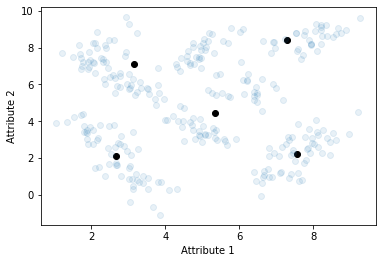

Strategy 1 with Initialization 2 for cluster 6 the initial centers are: [[7.52963009 8.79617112]
 [6.12393256 5.49223251]
 [2.68080913 1.61298226]
 [5.09046134 8.01800423]
 [5.14468217 3.26589278]
 [3.98724311 4.0425478 ]]


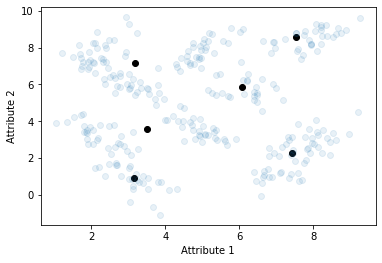

Strategy 1 with Initialization 2 for cluster 7 the initial centers are: [[8.09209017 3.39065059]
 [5.17889443 8.78645074]
 [2.77605992 2.74592055]
 [8.22627485 2.26048701]
 [4.96433498 7.88753239]
 [4.9511002  8.08344216]
 [6.47098788 5.4510163 ]]


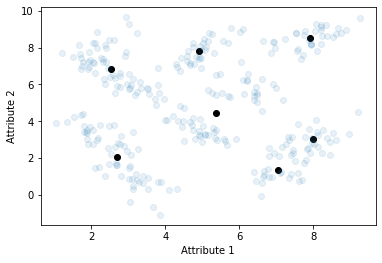

Strategy 1 with Initialization 2 for cluster 8 the initial centers are: [[2.47238755 3.7285616 ]
 [2.36057145 6.00796623]
 [2.61234619 8.39116666]
 [4.75184863 4.20214023]
 [6.94511561 8.30517945]
 [2.95147442 7.76615605]
 [8.21925014 9.11712554]
 [4.32239695 0.33088885]]


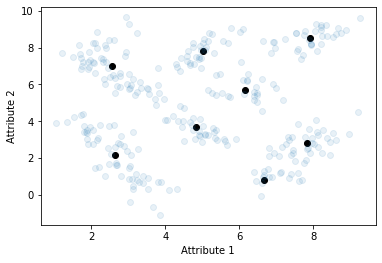

Strategy 1 with Initialization 2 for cluster 9 the initial centers are: [[ 3.09999409  0.8385499 ]
 [ 1.05217427  3.88943741]
 [ 7.72715541  7.62018213]
 [ 1.3483716   3.96379638]
 [ 4.34489155  3.99726667]
 [ 8.87578072  8.96092361]
 [ 3.57542555  5.47748903]
 [ 6.5807212  -0.0766824 ]
 [ 5.37413088  5.44219234]]


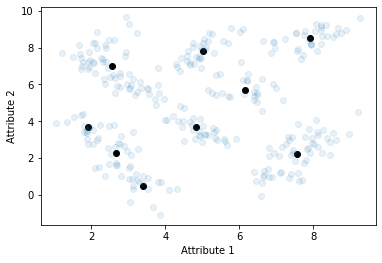

Strategy 1 with Initialization 2 for cluster 10 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 4.96433498  7.88753239]
 [ 4.90270653  3.48642863]
 [ 5.48121965  6.55171777]
 [ 8.67805277  9.08757916]
 [ 4.95185958  4.11756694]
 [ 8.36230458  3.08961725]
 [ 4.5872861   7.29024049]
 [ 3.0093283   1.45065717]
 [ 2.58046907  6.53023549]]


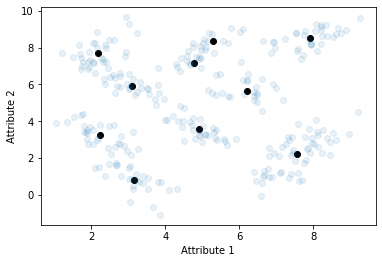

In [ ]:
#Strategy 1 with Initialization 2
last = []
for i in range(2,11):
    p = random.sample(range(0, len(data)), i)
    cen = []
    #Randomly picking the initial centers 
    for j in p:
        cen.append(data.loc[j])
    cen = np.array(cen)
    print("Strategy 1 with Initialization 2 for cluster "+str(i)+" the initial centers are:",cen)
    #Performing the K-Means Algorithm & checking the convergence condition with the help of objective function.  
    before = 0
    objective_distance=objective_function(cen,data1,i)
    #If the objective distance of the two consecutive steps is equal then the loop terminates. 
    while before-objective_distance:
        before = objective_distance
        new_cen = Cluster_Assignment(cen, data1)
        cen = new_centroids_calculation(new_cen, data1)
        objective_distance=objective_function(cen,data1,i)
    last.append(objective_distance)
    plt.scatter([cen[i][0] for i in range(0,len(cen))], [cen[i][1] for i in range(len(cen))] ,color='black')
    plt.scatter(data['a1'],data['a2'], alpha=0.1)
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.show()

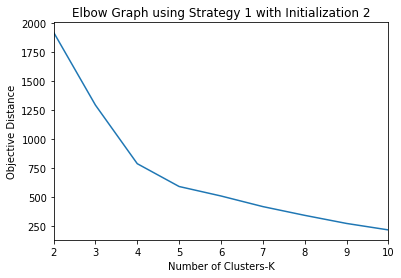

In [ ]:
#Plotting the objective function distance vs number of k clusters Strategy 1 with Initialization 2
k= [2,3,4,5,6,7,8,9,10]
plt.plot(k, last)
plt.xlim(2,10)
plt.title('Elbow Graph using Strategy 1 with Initialization 2')
plt.ylabel('Objective Distance')
plt.xlabel('Number of Clusters-K')
plt.show()

In [ ]:
#Strategy 2

#Initial Centroids initialization
def strategy_2_initialization(s, k, data2): 
    cen = []
    a,c = avg(s, data2)
    c = np.array(c)
    s.append(c)
    data2 = np.delete(data2,a,0)
    return s, data2

#This function returns the data point such that the average distance of this chosen one to all previous (i-1) centers is maximal.
def avg(cen, data1):
    l = []
    for i in data1:
        d = []
        for j in cen:
          d.append(euclidean_distance(i, j))          
        l.append(np.average(d))
    a = np.argmax(l)
    return a,data1[a]

Strategy 2 with Initialization 1 for cluster 2 the initial centers are: [[2.44868927 2.55261552]
 [9.26998864 9.62492869]]


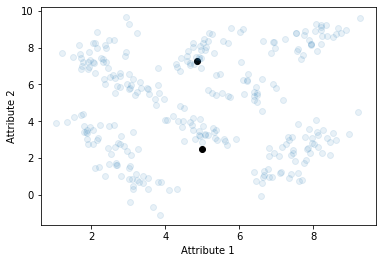

Strategy 2 with Initialization 1 for cluster 3 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]]


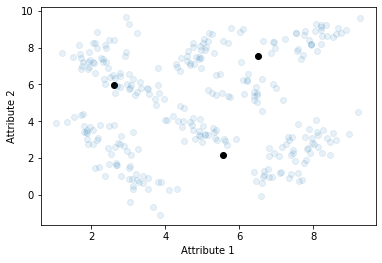

Strategy 2 with Initialization 1 for cluster 4 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]]


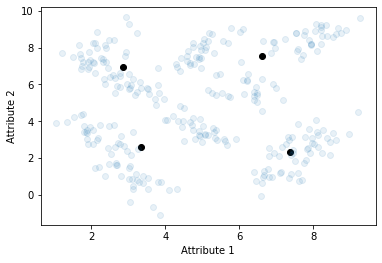

Strategy 2 with Initialization 1 for cluster 5 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]]


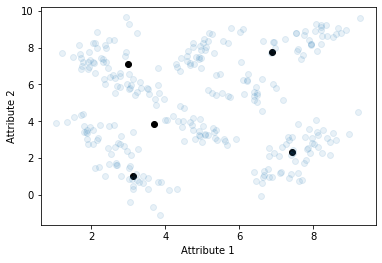

Strategy 2 with Initialization 1 for cluster 6 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]]


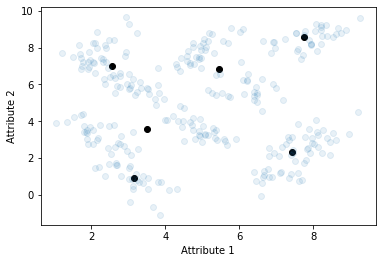

Strategy 2 with Initialization 1 for cluster 7 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]
 [ 1.20162248  7.68639714]]


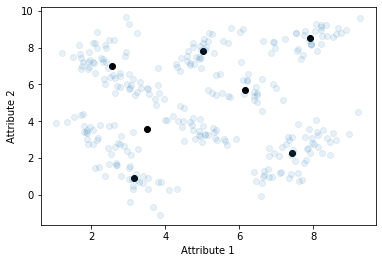

Strategy 2 with Initialization 1 for cluster 8 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]
 [ 1.20162248  7.68639714]
 [ 3.04101702 -0.36138487]]


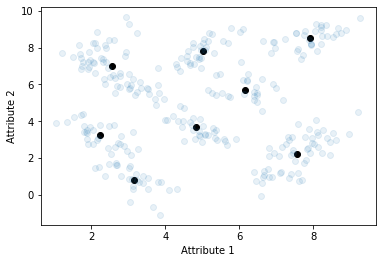

Strategy 2 with Initialization 1 for cluster 9 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]
 [ 1.20162248  7.68639714]
 [ 3.04101702 -0.36138487]
 [ 8.67805277  9.08757916]]


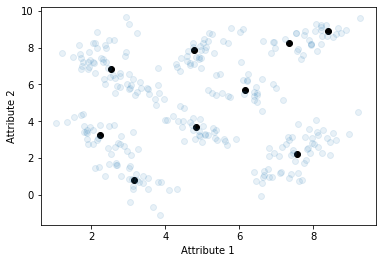

Strategy 2 with Initialization 1 for cluster 10 the initial centers are: [[ 2.44868927  2.55261552]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]
 [ 1.20162248  7.68639714]
 [ 3.04101702 -0.36138487]
 [ 8.67805277  9.08757916]
 [ 6.5807212  -0.0766824 ]]


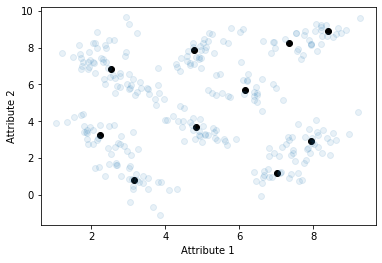

In [ ]:
#Strategy 2 with Initialization 1
last= []
data2 = data1
#Centroids initialization
#First cluster initial center is choosen randomly
s = []
one = random.sample(range(0, len(data)), 1)
point = data.loc[one]
cen = np.array(point)
s.append(cen[0])
data2 = np.delete(data2,one,0)
for i in range(2,11):
    cen, data2 = strategy_2_initialization(s,i, data2)
    cen = np.array(cen)
    print("Strategy 2 with Initialization 1 for cluster "+str(i)+" the initial centers are:",cen)
    #Performing the K-Means Algorithm & checking the convergence condition with the help of objective function.  
    before = 0
    objective_distance=objective_function(cen,data1,i)
    #If the objective distance of the two consecutive steps is equal then the loop terminates.
    while before-objective_distance:
        before = objective_distance
        new_cen = Cluster_Assignment(cen, data1)
        cen = new_centroids_calculation(new_cen, data1)
        objective_distance=objective_function(cen,data1,i)
    last.append(objective_distance)
    plt.scatter([cen[i][0] for i in range(0,len(cen))], [cen[i][1] for i in range(len(cen))] ,color='black')
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.scatter(data['a1'],data['a2'], alpha=0.1)
    plt.show()

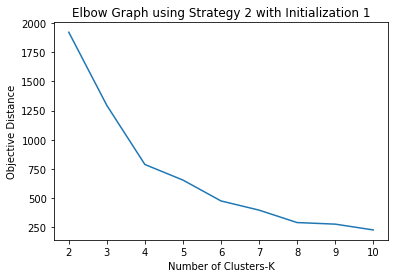

In [ ]:
#Plotting the objective function distance vs number of k clusters for Strategy 2 with Initialization 1
k= [2,3,4,5,6,7,8,9,10]  
plt.plot(k, last)
plt.title('Elbow Graph using Strategy 2 with Initialization 1')
plt.ylabel('Objective Distance')
plt.xlabel('Number of Clusters-K')
plt.show()

Strategy 2 with Initialization 2 for cluster 2 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]]


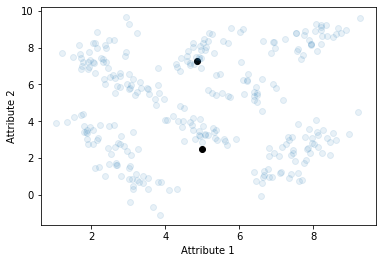

Strategy 2 with Initialization 2 for cluster 3 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]]


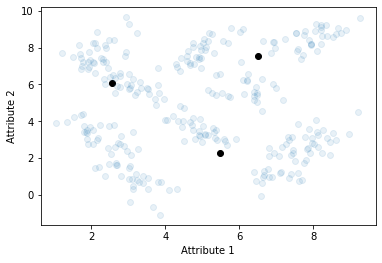

Strategy 2 with Initialization 2 for cluster 4 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]]


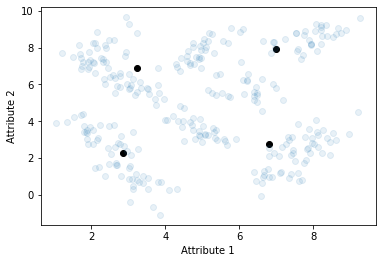

Strategy 2 with Initialization 2 for cluster 5 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]]


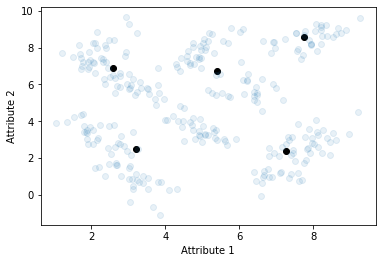

Strategy 2 with Initialization 2 for cluster 6 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]]


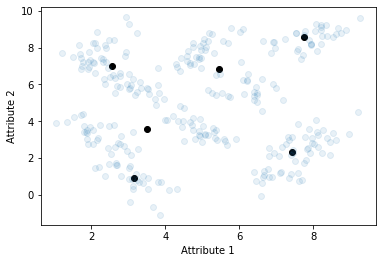

Strategy 2 with Initialization 2 for cluster 7 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]]


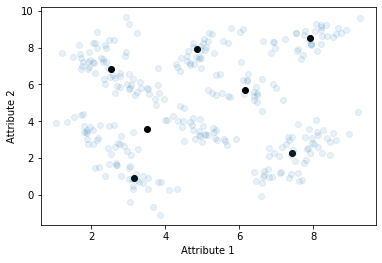

Strategy 2 with Initialization 2 for cluster 8 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 6.5807212  -0.0766824 ]]


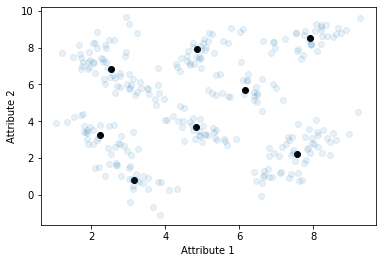

Strategy 2 with Initialization 2 for cluster 9 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 6.5807212  -0.0766824 ]
 [ 2.14633887  8.83030888]]


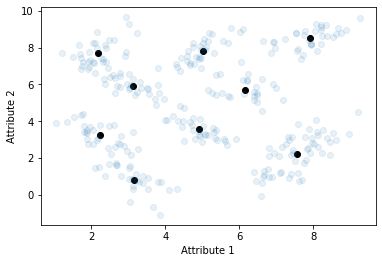

Strategy 2 with Initialization 2 for cluster 10 the initial centers are: [[ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 6.5807212  -0.0766824 ]
 [ 2.14633887  8.83030888]
 [ 8.67805277  9.08757916]]


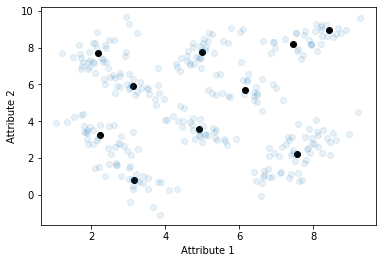

In [ ]:
#Strategy 2 with Initialization 2
last= []
data2 = data1
#Centroids initialization
#First cluster initial center is choosen randomly
s = []
one = random.sample(range(0, len(data)), 1)
point = data.loc[one]
cen = np.array(point)
s.append(cen[0])
data2 = np.delete(data2,one,0)
for i in range(2,11):
    cen, data2 = strategy_2_initialization(s,i, data2)
    cen = np.array(cen)
    print("Strategy 2 with Initialization 2 for cluster "+str(i)+" the initial centers are:",cen)
    #Performing the K-Means Algorithm & checking the convergence condition with the help of objective function.  
    before = 0
    objective_distance=objective_function(cen,data1,i)
    #If the objective distance of the two consecutive steps is equal then the loop terminates.
    while before-objective_distance:
        before = objective_distance
        new_cen = Cluster_Assignment(cen, data1)
        cen = new_centroids_calculation(new_cen, data1)
        objective_distance=objective_function(cen,data1,i)
    last.append(objective_distance)
    plt.scatter([cen[i][0] for i in range(0,len(cen))], [cen[i][1] for i in range(len(cen))] ,color='black')
    plt.xlabel("Attribute 1")
    plt.ylabel("Attribute 2")
    plt.scatter(data['a1'],data['a2'], alpha=0.1)
    plt.show()

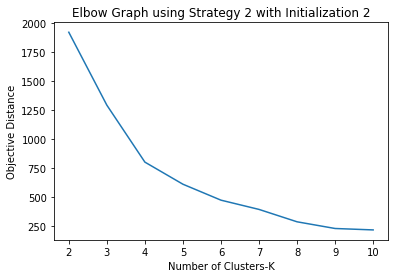

In [ ]:
#Plotting the objective function distance vs number of k clusters for Strategy 2 with Initialization 2
k= [2,3,4,5,6,7,8,9,10]  
plt.plot(k, last)
plt.title('Elbow Graph using Strategy 2 with Initialization 2')
plt.ylabel('Objective Distance')
plt.xlabel('Number of Clusters-K')
plt.show()